In [95]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'Y')

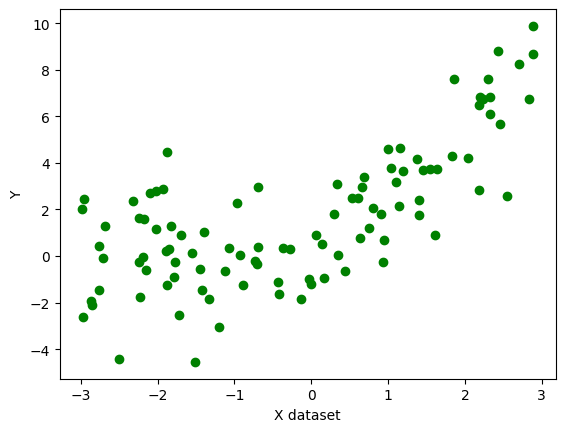

In [96]:
X = 6*np.random.rand(100, 1) - 3
y = 0.5*X**2 + 1.5*X + 2*np.random.randn(100,1)

plt.scatter(X, y, color='g')
plt.xlabel("X dataset")
plt.ylabel("Y")

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
## Lets implement a simple linear reg

from sklearn.linear_model import LinearRegression

In [99]:
regression_1 = LinearRegression()


In [100]:
regression_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression_1.predict(X_test))

In [102]:
score


0.46719144134043944

Text(0, 0.5, 'Y')

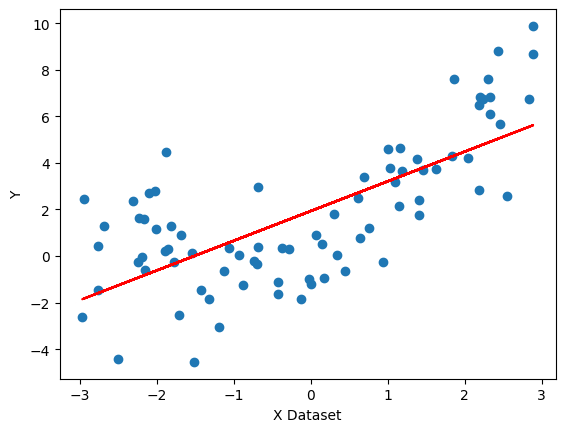

In [103]:
## Lets visualize the model

plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [104]:
# Lets apply polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

In [105]:
poly = PolynomialFeatures(degree =2, include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [106]:
X_train_poly

array([[ 1.00000000e+00, -1.81796570e+00,  3.30499929e+00],
       [ 1.00000000e+00,  2.55137501e+00,  6.50951445e+00],
       [ 1.00000000e+00, -2.68653619e+00,  7.21747668e+00],
       [ 1.00000000e+00, -6.88509123e-01,  4.74044812e-01],
       [ 1.00000000e+00, -1.88287358e+00,  3.54521292e+00],
       [ 1.00000000e+00,  1.46705692e-01,  2.15225600e-02],
       [ 1.00000000e+00,  9.38848693e-01,  8.81436868e-01],
       [ 1.00000000e+00,  2.23098508e+00,  4.97729444e+00],
       [ 1.00000000e+00, -2.49567842e-02,  6.22841075e-04],
       [ 1.00000000e+00, -1.12814144e+00,  1.27270310e+00],
       [ 1.00000000e+00,  1.09800649e+00,  1.20561824e+00],
       [ 1.00000000e+00,  1.66473110e-01,  2.77132962e-02],
       [ 1.00000000e+00, -2.80074085e-01,  7.84414928e-02],
       [ 1.00000000e+00, -1.19923040e+00,  1.43815355e+00],
       [ 1.00000000e+00,  3.45354187e-01,  1.19269514e-01],
       [ 1.00000000e+00,  1.40284976e+00,  1.96798745e+00],
       [ 1.00000000e+00, -2.02584672e+00

In [107]:
X_test_poly

array([[ 1.        ,  0.91106291,  0.83003563],
       [ 1.        ,  0.94987439,  0.90226137],
       [ 1.        ,  1.6060783 ,  2.57948751],
       [ 1.        ,  0.66606947,  0.44364854],
       [ 1.        , -1.87249388,  3.50623333],
       [ 1.        , -1.78486748,  3.18575194],
       [ 1.        , -0.96648567,  0.93409455],
       [ 1.        , -2.22758795,  4.96214807],
       [ 1.        ,  1.55145411,  2.40700985],
       [ 1.        ,  0.52499265,  0.27561728],
       [ 1.        ,  0.80857873,  0.65379957],
       [ 1.        ,  2.70519795,  7.31809594],
       [ 1.        , -2.84620627,  8.10089011],
       [ 1.        ,  0.33761521,  0.11398403],
       [ 1.        , -2.70911397,  7.33929851],
       [ 1.        , -1.92236784,  3.69549811],
       [ 1.        , -1.38956534,  1.93089183],
       [ 1.        , -2.97978883,  8.87914148],
       [ 1.        , -2.86587724,  8.21325233],
       [ 1.        , -1.45108526,  2.10564844]])

In [108]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
y_pred = regression.predict(X_test_poly)

In [110]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

In [111]:
score

0.47717010215590094

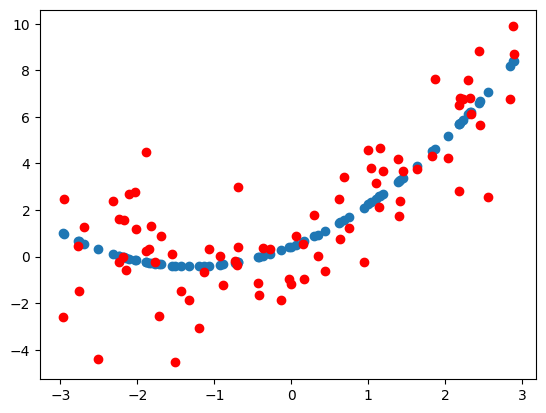

In [112]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train, color='r')

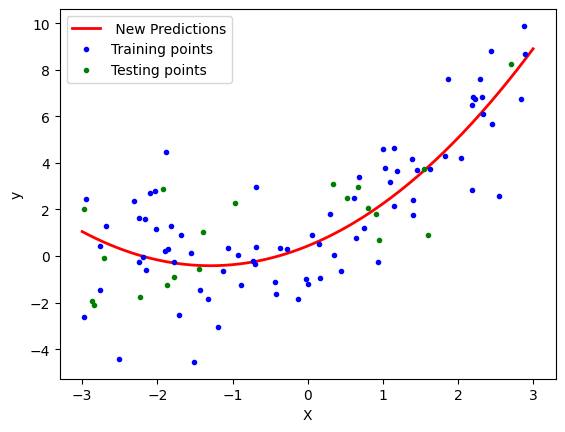

In [113]:
# Prediction of new data

X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [114]:
from sklearn.pipeline import Pipeline

In [115]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    # plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label='Degree' + str(degree), linewidth=2)
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.', linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])

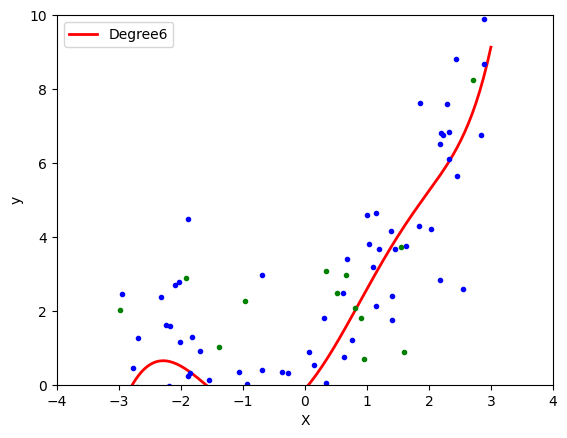

In [116]:
poly_regression(6)